# A Look at the Data

In [1]:
import os
print(os.getcwd())

C:\Users\tmost\Documents\Data-course\Udacity


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import test1 as t
import solution1 as s
from IPython import display
%matplotlib inline

In [3]:
df = pd.read_csv('survey-results-public.csv') 
#schema = pd.read_csv('survey-results-schema.csv')

In [4]:
df.head(2)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0


In [5]:
df.shape

(51392, 154)

## Question 1

1. Provide the number of rows and columns in this dataset.

In [6]:
num_rows = df.shape[0]
num_cols = df.shape[1]
print(num_rows)
print(num_cols)

51392
154


In [7]:
# If we made a mistake - a different prompt will appear

flipped_num_rows = df.shape[1] #Provide the number of rows in the dataset
flipped_num_cols = df.shape[0] #Provide the number of columns in the dataset

t.check_rows_cols(flipped_num_rows, flipped_num_cols) 

That doesn't look like what we were expecting for the number of rows.
That doesn't look like what we were expecting for the number of columns.


In [8]:
# If you want to know more about what the test function is expecting, 
# you can read the documentation the same way as any other funtion

t.check_rows_cols

<function test1.check_rows_cols(num_rows, num_cols)>

## Question 2

2. Which columns had no missing values? Provide a set of column names that have no missing values.

In [9]:
np.sum(df.isnull()) == 0

Respondent               True
Professional             True
ProgramHobby             True
Country                  True
University               True
                        ...  
QuestionsInteresting    False
QuestionsConfusing      False
InterestedAnswers       False
Salary                  False
ExpectedSalary          False
Length: 154, dtype: bool

In [10]:
df.columns[np.sum(df.isnull()) == 0]

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation'],
      dtype='object')

In [11]:
no_null = set(df.columns[df.isnull().mean()==0])
no_null

{'Country',
 'EmploymentStatus',
 'FormalEducation',
 'Professional',
 'ProgramHobby',
 'Respondent',
 'University'}

## Question 3

3. Which columns have the most missing values? Provide a set of column names that have more than 75% of their values missing.

In [12]:
df.columns[np.sum(df.isnull())/df.shape[0] > .75] 
#1 takethe number of missing values. 2divided by number of rows possible, 3> than 75 and then 4give me the column name

Index(['YearsCodedJobPast', 'WebDeveloperType', 'MobileDeveloperType',
       'NonDeveloperType', 'ExCoderReturn', 'ExCoderNotForMe',
       'ExCoderBalance', 'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills',
       'ExCoderWillNotCode', 'ExCoderActive', 'TimeAfterBootcamp',
       'ExpectedSalary'],
      dtype='object')

In [13]:
most_missing_cols = set(df.columns[df.isnull().mean() > 0.75])
most_missing_cols

{'ExCoder10Years',
 'ExCoderActive',
 'ExCoderBalance',
 'ExCoderBelonged',
 'ExCoderNotForMe',
 'ExCoderReturn',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExpectedSalary',
 'MobileDeveloperType',
 'NonDeveloperType',
 'TimeAfterBootcamp',
 'WebDeveloperType',
 'YearsCodedJobPast'}

## Question 4

4. Provide a pandas series of the different **Professional status** values in the dataset along with the count of the number of individuals with each status. Store this pandas series in status_vals. If you are correct, you should see a bar chart of the proportion of individuals in each status.

In [14]:
df['Professional'].value_counts()

Professional developer                                  36131
Student                                                  8224
Professional non-developer who sometimes writes code     5140
Used to be a professional developer                       983
None of these                                             914
Name: Professional, dtype: int64

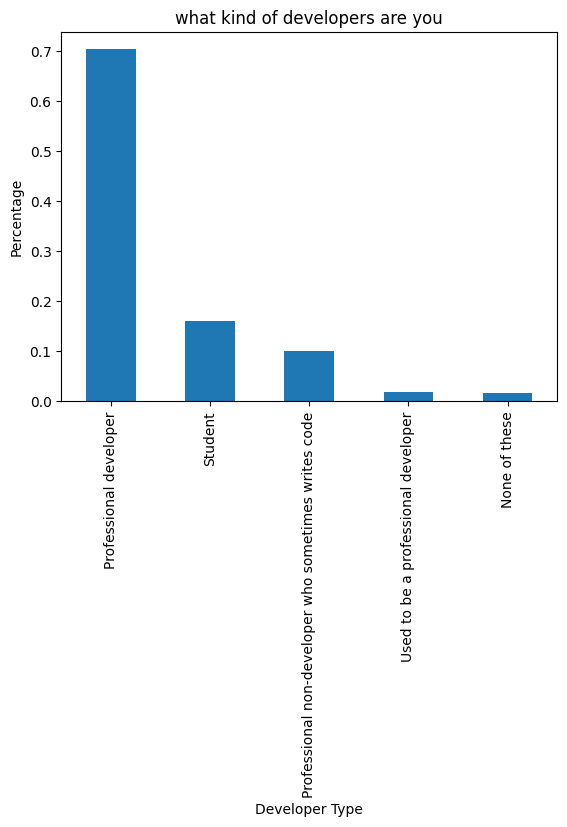

In [15]:
status_vals = df['Professional'].value_counts()

(status_vals/df.shape[0]).plot(kind='bar')

plt.title('what kind of developers are you')
plt.xlabel('Developer Type')  # Adding an x-label for clarity
plt.ylabel('Percentage')
plt.show()

## Question 5

5. Provide a pandas series of the different FormalEducation status values in the dataset along with the count of how many individuals received that formal education. Store this pandas series in ed_vals. If you are correct, you should see a bar chart of the proportion of individuals in each status.

Text(0.5, 1.0, 'Formal Education')

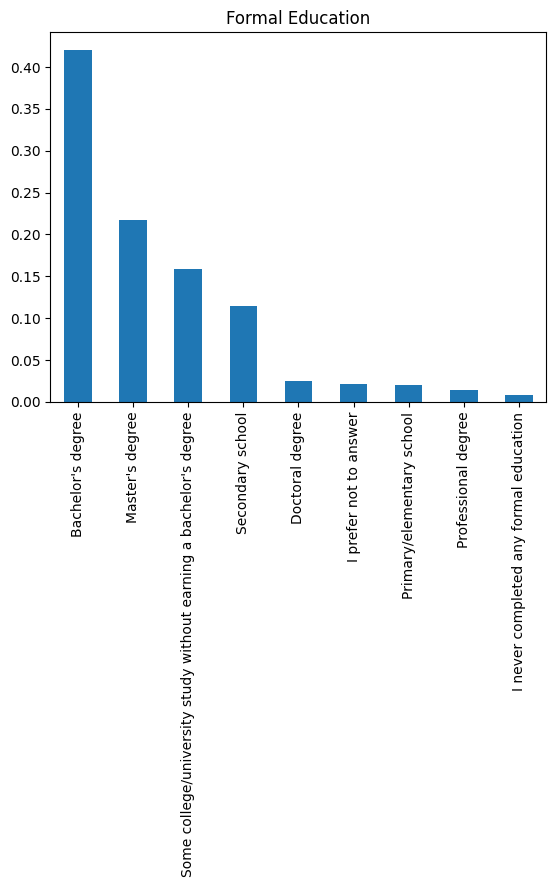

In [16]:
ed_vals = df['FormalEducation'].value_counts()

(ed_vals/df.shape[0]).plot(kind='bar')
plt.title('Formal Education')
#ed_vals/df.shape/value_counts

## Question 6

6. Provide a pandas series of the different Country values in the dataset along with the count of how many individuals are from each country. Store this pandas series in count_vals. If you are correct, you should see a bar chart of the proportion of individuals in each country.

Text(0.5, 1.0, 'Country')

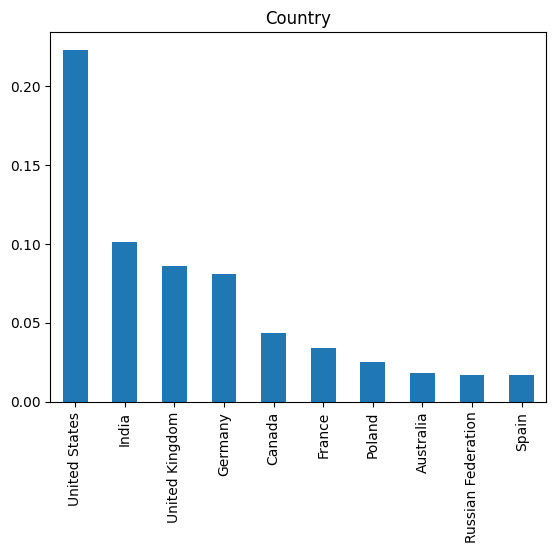

In [17]:
count_vals = df['Country'].value_counts()

(count_vals[:10]/df.shape[0]).plot(kind='bar')
plt.title('Country')